<a href="https://colab.research.google.com/github/AycaCicek/Turkcell-ML-DogrusalOlmayanRegresyonModelleri/blob/main/CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
data=pd.read_csv("/content/Hitters.csv")
data.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N


In [3]:
data=data.dropna()
data_encoding=pd.get_dummies(data[["League","Division","NewLeague"]])

y=data["Salary"]
X_=data.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,data_encoding[["League_N","Division_W","NewLeague_N"]]],axis=1)

In [4]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [5]:
data_encoding.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


Model ve Tahmin

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [7]:
len(X_train)

197

In [8]:
len(y_train)

197

In [9]:
X_train=pd.DataFrame(X_train["Hits"])
X_test=pd.DataFrame(X_test["Hits"])

In [10]:
X_train.head(2)

,Hits
183,91.0
229,144.0


In [11]:
cart_model=DecisionTreeRegressor()

In [12]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


Text(0, 0.5, 'Maaş(Salary)')

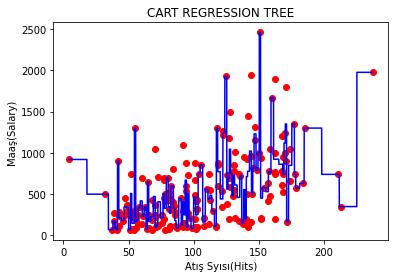

In [16]:
X_grid=np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid=X_grid.reshape((len(X_grid),1))

plt.scatter(X_train,y_train,color="red")
plt.plot(X_grid,cart_model.predict(X_grid),color="blue")

plt.title("CART REGRESSION TREE")
plt.xlabel("Atış Syısı(Hits)")
plt.ylabel("Maaş(Salary)")

In [21]:
cart_model_deneme=DecisionTreeRegressor(max_leaf_nodes=10)

In [22]:
cart_model_deneme.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


Text(0, 0.5, 'Maaş(Salary)')

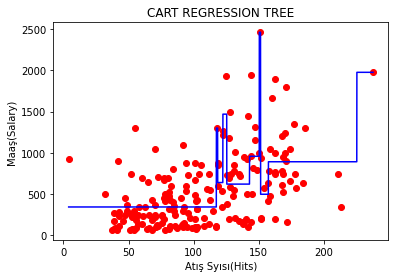

In [23]:
X_grid=np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid=X_grid.reshape((len(X_grid),1))

plt.scatter(X_train,y_train,color="red")
plt.plot(X_grid,cart_model_deneme.predict(X_grid),color="blue")

plt.title("CART REGRESSION TREE")
plt.xlabel("Atış Syısı(Hits)")
plt.ylabel("Maaş(Salary)")

In [24]:
cart_model_deneme.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [26]:
y_pred=cart_model_deneme.predict(X_test)

Tek Değişkenli!!!

In [27]:
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

ÇOK DEĞİŞKENLİ İÇİN

In [28]:
data=data.dropna()
data_encoding=pd.get_dummies(data[["League","Division","NewLeague"]])

y=data["Salary"]
X_=data.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,data_encoding[["League_N","Division_W","NewLeague_N"]]],axis=1)

In [29]:
X.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
6,185.0,37.0,1.0,23.0,8.0,21.0,2.0,214.0,42.0,1.0,30.0,9.0,24.0,76.0,127.0,7.0,1,0,0
7,298.0,73.0,0.0,24.0,24.0,7.0,3.0,509.0,108.0,0.0,41.0,37.0,12.0,121.0,283.0,9.0,0,1,0
8,323.0,81.0,6.0,26.0,32.0,8.0,2.0,341.0,86.0,6.0,32.0,34.0,8.0,143.0,290.0,19.0,1,1,1
9,401.0,92.0,17.0,49.0,66.0,65.0,13.0,5206.0,1332.0,253.0,784.0,890.0,866.0,0.0,0.0,0.0,0,0,0
10,574.0,159.0,21.0,107.0,75.0,59.0,10.0,4631.0,1300.0,90.0,702.0,504.0,488.0,238.0,445.0,22.0,0,0,0


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
len(X_train)

197

In [35]:
len(y_train)

197

In [38]:
cart_model=DecisionTreeRegressor(max_leaf_nodes=10).fit(X_train,y_train)

In [39]:
y_pred = cart_model.predict(X_test)

In [40]:
np.sqrt(mean_squared_error(y_test,y_pred))

450.02024012019865

CART MODEL TUNING

In [41]:
cart_model=DecisionTreeRegressor().fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

448.68861514156066

In [42]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

 HİPERPARAMETRE : max_depth ve min_samples_split

In [45]:
max_depth=np.arange(1,11)
for depth in max_depth:
  cart_model=DecisionTreeRegressor(max_depth=depth).fit(X_train,y_train)
  y_pred = cart_model.predict(X_test)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  print(f"""depth : {depth} --> RMSE : {RMSE}""")

depth : 1 --> RMSE : 427.9463386097717
depth : 2 --> RMSE : 417.00487927726425
depth : 3 --> RMSE : 391.5530522634766
depth : 4 --> RMSE : 464.73738413857467
depth : 5 --> RMSE : 463.45681552900174
depth : 6 --> RMSE : 553.9200694824139
depth : 7 --> RMSE : 514.4574117143104
depth : 8 --> RMSE : 434.63193917510335
depth : 9 --> RMSE : 483.35734377356926
depth : 10 --> RMSE : 526.0586459253332


In [46]:
cart_params = {"max_depth": [2,3,4,5,10,20],"min_samples_split": [2,10,5,30,50,10]}

In [47]:
cart_model=DecisionTreeRegressor()

In [48]:
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

In [49]:
cart_cv_model.best_params_

{'max_depth': 20, 'min_samples_split': 50}

In [ ]:
#final model

In [51]:
cart_tuned_model=DecisionTreeRegressor(max_depth=20, min_samples_split= 50).fit(X_train,y_train)

In [52]:
y_pred=cart_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

361.0876906511434